## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import string
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/xaviersantos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xaviersantos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/xaviersantos/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xaviersantos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Preprocessing Steps

### Open CSV and analyze columns

In [2]:
df = pd.read_csv('../data/movies_database.csv', na_values=['#EMPTY?'])

# Fix the &apos; formatting problem
df['Description'] = df['Description'].str.replace("&apos;", "'")
df['Name'] = df['Name'].str.replace("&apos;", "'")
df['Keywords'] = df['Keywords'].str.replace("&apos;", "'")

df.head(5)

,Name,Date Published,Description,Rating,Rating Count,Content Rating,Genre(s),Keywords
0,9 to 5: Days in Porn,2009-07-02,NaN,6.3,2173.0,Not Rated,Documentary,"sex,female frontal nudity,female rear nudity,a..."
1,Stir Crazy,1981-09-03,NaN,6.7,29268.0,R,"Comedy,Crime","prison,prison yard,cell mate,woodpecker costum..."
2,The Blue Lagoon,1923-02-05,"In the Victorian period, two children are ship...",5.4,37.0,NaN,Drama,based on novel
3,Any Which Way You Can,1981-10-09,NaN,6.1,20075.0,PG,"Action,Comedy","sequel,machismo,vendetta,farce,abduction"
4,Smokey and the Bandit II,1981-08-14,NaN,5.2,16590.0,PG,"Action,Adventure,Comedy","sheriff,road movie,elephant,car crash,hixploit..."


In [3]:
df.dtypes

Name               object
Date Published     object
Description        object
Rating            float64
Rating Count      float64
Content Rating     object
Genre(s)           object
Keywords           object
dtype: object

In [4]:
df.isnull().sum()

Name                 0
Date Published     613
Description       3696
Rating             175
Rating Count       175
Content Rating    1860
Genre(s)             0
Keywords           348
dtype: int64

#### Drop null entries compare before and after

In [5]:
df["Name"].size

9784

In [6]:
df = df.dropna(subset="Description")

In [7]:
df["Name"].size

6088

In [8]:
df.isnull().sum()

Name                 0
Date Published     391
Description          0
Rating             123
Rating Count       123
Content Rating    1276
Genre(s)             0
Keywords           233
dtype: int64

#### Remove repeated entries

In [9]:
df["Description"].size

6088

In [10]:
df = df.drop_duplicates(subset="Description")
df["Description"].size

5903

#### Encode Genre(s) Column 

In [11]:
dummies = df["Genre(s)"].str.get_dummies(sep=",")
df = pd.concat([df, dummies], axis=1)
df = df.drop("Genre(s)", axis=1)
pd.set_option("display.max_columns", None)
df.head(5)

,Name,Date Published,Description,Rating,Rating Count,Content Rating,Keywords,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
2,The Blue Lagoon,1923-02-05,"In the Victorian period, two children are ship...",5.4,37.0,NaN,based on novel,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,The Best of the Blues Brothers,NaN,Dan Aykroyd and friends tell the story of the ...,7.6,441.0,NaN,"actor playing multiple roles,independent film",0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,The Gods Must Be Crazy,1982-09-09,A comic allegory about a traveling Bushman who...,7.3,57535.0,M/12,"junk,junk food,multinational corporation,pop,p...",0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Star Wars: Episode IX - The Rise of Skywalker,2019-12-19,In the riveting conclusion of the landmark Sky...,6.5,462982.0,M/12,"evil,quicksand,space opera,star wars,disney st...",1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,National Lampoon's Animal House,1980-10-24,"At a 1962 college, Dean Vernon Wormer is deter...",7.4,124436.0,R,"academic probation,toga party,fraternity,stuff...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Analysis 

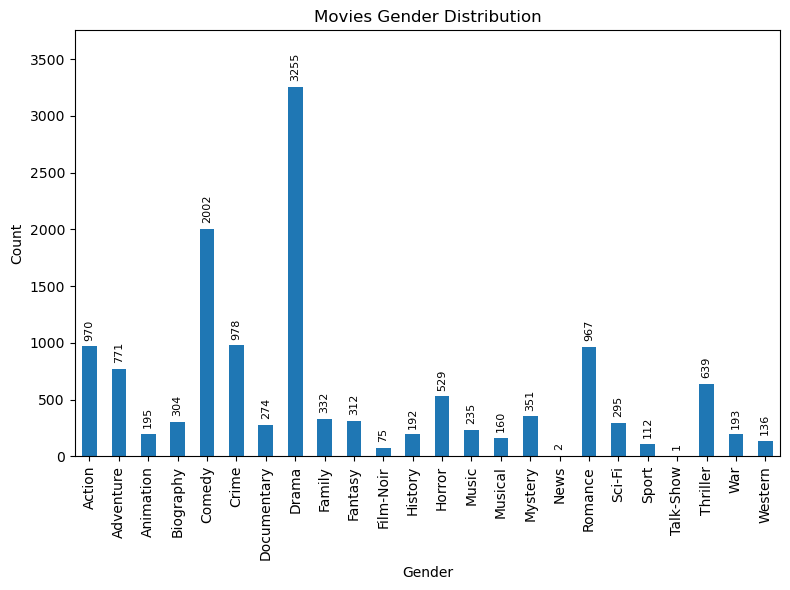

In [12]:
index_start = df.columns.get_loc('Action')
index_end = df.columns.get_loc('Western')
genders_df = df.iloc[:, index_start:index_end+1]
sum_genders = genders_df.sum()
sum_genders_df = sum_genders.to_frame()

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
sum_genders_df.plot(kind="bar", ax=ax, legend=None)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Movies Gender Distribution")

# Add count labels to each bar
for i, v in enumerate(sum_genders_df.iloc[:, 0]):
    ax.text(i, v+50, str(v), ha='center', va='bottom', rotation=90, fontsize=8)

# Add padding to the y-axis limits
ax.set_ylim(0, max(sum_genders_df.iloc[:, 0])+500)

# Show the plot
plt.tight_layout()
plt.show()

#### Drop entries with genre's that do not belong

In [13]:
genres_to_remove = ['News', 'Talk-Show'];
entries_to_remove = df.loc[(df[genres_to_remove] == 1).any(axis=1)]

df = df.drop(entries_to_remove.index, axis=0)
df.drop(genres_to_remove, axis=1, inplace=True)

index_start = df.columns.get_loc('Action')
index_end = df.columns.get_loc('Western')
df.iloc[:, index_start:index_end+1].sum()

Action          970
Adventure       771
Animation       195
Biography       304
Comedy         2002
Crime           978
Documentary     271
Drama          3255
Family          332
Fantasy         312
Film-Noir        75
History         192
Horror          529
Music           235
Musical         160
Mystery         351
Romance         967
Sci-Fi          295
Sport           112
Thriller        639
War             193
Western         136
dtype: int64

In [14]:
# List of columns to check for 0 values
index_start = df.columns.get_loc('Action')
index_end = df.columns.get_loc('Western')

df = df.drop(["Sport", "Film-Noir"], axis=1)

# Create a boolean condition to select rows where at least one column has a non-zero value
condition = (df.iloc[:, index_start:index_end+1] != 0).any(axis=1)

# Filter rows based on the condition
filtered_df = df[condition]

print("DF Size: ", df.size)
print("Filtered Size: ", filtered_df.size)

DF Size:  159300
Filtered Size:  159246


In [15]:
df['Action and Adventure'] = df[['Action', 'Adventure', 'War', 'Western']].max(axis=1)
df['Documentary and History'] = df[['Documentary', 'History', 'Biography']].max(axis=1)
df['Family and Animation'] = df[['Family', 'Animation']].max(axis=1)
df['Fantasy and Sci-Fi'] = df[['Fantasy', 'Sci-Fi']].max(axis=1)
df['Musical'] = df[['Music', 'Musical']].max(axis=1)
df['Horror and Thriller'] = df[['Horror', 'Thriller', 'Mystery']].max(axis=1)


df = df.drop(columns=['Action', 'Adventure', 'War', 'Western','Documentary', 'History', 'Biography','Family', 'Animation', 'Fantasy', 'Sci-Fi', 'Music', 'Musical', 'Horror', 'Thriller', 'Mystery'])

df.head(5)


,Name,Date Published,Description,Rating,Rating Count,Content Rating,Keywords,Comedy,Crime,Drama,Romance,Action and Adventure,Documentary and History,Family and Animation,Fantasy and Sci-Fi,Horror and Thriller
2,The Blue Lagoon,1923-02-05,"In the Victorian period, two children are ship...",5.4,37.0,NaN,based on novel,0,0,1,0,0,0,0,0,0
6,The Best of the Blues Brothers,NaN,Dan Aykroyd and friends tell the story of the ...,7.6,441.0,NaN,"actor playing multiple roles,independent film",0,0,0,0,0,1,0,0,0
7,The Gods Must Be Crazy,1982-09-09,A comic allegory about a traveling Bushman who...,7.3,57535.0,M/12,"junk,junk food,multinational corporation,pop,p...",1,0,0,0,1,0,0,0,0
8,Star Wars: Episode IX - The Rise of Skywalker,2019-12-19,In the riveting conclusion of the landmark Sky...,6.5,462982.0,M/12,"evil,quicksand,space opera,star wars,disney st...",0,0,0,0,1,0,0,1,0
9,National Lampoon's Animal House,1980-10-24,"At a 1962 college, Dean Vernon Wormer is deter...",7.4,124436.0,R,"academic probation,toga party,fraternity,stuff...",1,0,0,0,0,0,0,0,0


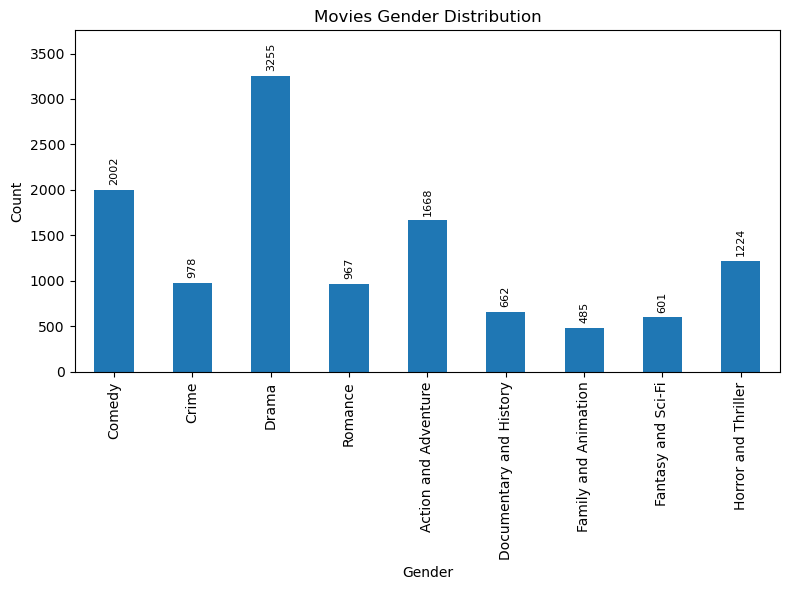

In [16]:
index_start = df.columns.get_loc('Comedy')
index_end = df.columns.get_loc('Horror and Thriller')
genders_df = df.iloc[:, index_start:index_end+1]
sum_genders = genders_df.sum()
sum_genders_df = sum_genders.to_frame()

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
sum_genders_df.plot(kind="bar", ax=ax, legend=None)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Movies Gender Distribution")

# Add count labels to each bar
for i, v in enumerate(sum_genders_df.iloc[:, 0]):
    ax.text(i, v+50, str(v), ha='center', va='bottom', rotation=90, fontsize=8)

# Add padding to the y-axis limits
ax.set_ylim(0, max(sum_genders_df.iloc[:, 0])+500)

# Show the plot
plt.tight_layout()
plt.show()

## Keyword Extraction

In [19]:
df['Keywords'] = df['Keywords'].fillna(" ")
df['Keywords'] = df["Keywords"].str.split(",")
tokenizer = RegexpTokenizer(r'[a-zA-z]+')
df['Description Tokenized'] = df.apply(lambda row: tokenizer.tokenize(row['Description']), axis=1)
df['Description Tokenized'] = df['Description Tokenized'] + df['Keywords']

df.drop(columns=['Description', 'Keywords'])

df.head(5)

,Name,Date Published,Description,Rating,Rating Count,Content Rating,Keywords,Comedy,Crime,Drama,Romance,Action and Adventure,Documentary and History,Family and Animation,Fantasy and Sci-Fi,Horror and Thriller,Description Tokenized
2,The Blue Lagoon,1923-02-05,"In the Victorian period, two children are ship...",5.4,37.0,NaN,[ ],0,0,1,0,0,0,0,0,0,"[In, the, Victorian, period, two, children, ar..."
6,The Best of the Blues Brothers,NaN,Dan Aykroyd and friends tell the story of the ...,7.6,441.0,NaN,[ ],0,0,0,0,0,1,0,0,0,"[Dan, Aykroyd, and, friends, tell, the, story,..."
7,The Gods Must Be Crazy,1982-09-09,A comic allegory about a traveling Bushman who...,7.3,57535.0,M/12,[ ],1,0,0,0,1,0,0,0,0,"[A, comic, allegory, about, a, traveling, Bush..."
8,Star Wars: Episode IX - The Rise of Skywalker,2019-12-19,In the riveting conclusion of the landmark Sky...,6.5,462982.0,M/12,[ ],0,0,0,0,1,0,0,1,0,"[In, the, riveting, conclusion, of, the, landm..."
9,National Lampoon's Animal House,1980-10-24,"At a 1962 college, Dean Vernon Wormer is deter...",7.4,124436.0,R,[ ],1,0,0,0,0,0,0,0,0,"[At, a, college, Dean, Vernon, Wormer, is, det..."
